# Bibliotecas

In [32]:
from tabulate import tabulate

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [33]:
%reset -f # clean Jupyter Variables

Don't know how to reset  #, please run `%reset?` for details
Don't know how to reset  clean, please run `%reset?` for details
Don't know how to reset  jupyter, please run `%reset?` for details
Don't know how to reset  variables, please run `%reset?` for details


# Parte I

In [34]:
def P(x):
    """
    Função analítica P(x).

    Parâmetros:
        • x: (float ou lista de float). x ∈ R.
    Retorno:
        • (float ou lista de float). P(x) ∈ R.
    """

    return 1 - x*np.exp(-((x - 3.698)**2)/(0.1**2))

def Q(x):
    """
    Função analítica Q(x).

    Parâmetros:
        • x: (float ou lista de float). x ∈ R.
    Retorno:
        • (float ou lista de float). Q(x) ∈ R.
    """

    return 1 - 3/(4 + 4*x**2) - x*np.arcsin((1/x)/(np.sqrt(1 + (1/x)**2)))

def D(theta, g=9.81, h=50, V=90):
    """
    Função analítica D(theta).

    Parâmetros:
        • theta: (float ou lista de float). Ângulo(s) em [º].
        • g: (float). Aceleração gravitacional em [m/s²].
        • h: (float). Altura em [m].
        • V: (float). Velocidade em [m/s].
    Retorno:
        • (float ou lista de float). Distância em [m]. D(θ) ∈ R.
    """
    thetaRad = np.deg2rad(theta)

    return (((V*np.sin(thetaRad))/g) + np.sqrt(((2*h)/g) + ((V*np.sin(thetaRad))/g)**2))*V*np.cos(thetaRad)

## Exercício 1

### (b)

In [35]:
def metodoComparacaoPontosRede(N, a, b, f, xBarra=None):
    """
    Método de Comparação de Pontos de Rede.

    Parâmetros:
        • N: (int). Número de subdivisões do intervalo.
        • a: (float). Limite inferior do intervalo (inclusive).
        • b: (float). Limite superior do intervalo (inclusive).
        • f: (função). Função a ser analisada.
        • xBarra: (float). Ponto de mínimo teórico.
    Retorno:
        • (tuple):
            - xMin: (float). Ponto de mínimo.
            - yMin: (float). Valor mínimo de f(x).
            - erro: (float). Diferença entre o valor mínimo encontrado e o teórico (se xBarra != None).
    """

    xs = np.linspace(a, b, N) # pontos uniformemente espaçados
    ys = f(xs) # pontos avaliados em f(x)
    idMin = np.argmin(ys) # índice do valor mínimo de f(x)
    xMin = xs[idMin] # ponto de mínimo
    yMin = ys[idMin] # valor mínimo de f(x)
    
    if xBarra:
        erro = abs(yMin - f(xBarra)) # erro absoluto

        return xMin, yMin, erro
    else:
        return xMin, yMin

xBarra = 3.698
a, b = 0, 9
kInf, kSup = 1, 10

resultadosDict = {"N": [],
                  "xMin": [],
                  "yMin": [],
                  "erro": []}

for k in range(kInf, kSup+1):
    N = 10*k
    xMin, yMin, erro = metodoComparacaoPontosRede(N, a, b, P, xBarra)
    resultadosDict["N"].append(N)
    resultadosDict["xMin"].append(xMin)
    resultadosDict["yMin"].append(yMin)
    resultadosDict["erro"].append(erro)

resultadosDF = pd.DataFrame(resultadosDict)
resultadosDF.to_csv("tables/exer_1-b.csv", index=False)
resultadosTable = tabulate(resultadosDF, headers="keys", showindex=False, tablefmt="fancy_grid", numalign="right", floatfmt=".6f")


print(f"Tabela 1: Resultados no intervalo [{a}, {b}] para diferentes valores de N em P(x).")
print(resultadosTable)

Tabela 1: Resultados no intervalo [0, 9] para diferentes valores de N em P(x).
╒════════════╤══════════╤═══════════╤══════════╕
│          N │     xMin │      yMin │     erro │
╞════════════╪══════════╪═══════════╪══════════╡
│  10.000000 │ 4.000000 │  0.999562 │ 3.697562 │
├────────────┼──────────┼───────────┼──────────┤
│  20.000000 │ 3.789474 │ -0.641292 │ 2.056708 │
├────────────┼──────────┼───────────┼──────────┤
│  30.000000 │ 3.724138 │ -2.478205 │ 0.219795 │
├────────────┼──────────┼───────────┼──────────┤
│  40.000000 │ 3.692308 │ -2.680363 │ 0.017637 │
├────────────┼──────────┼───────────┼──────────┤
│  50.000000 │ 3.673469 │ -2.458937 │ 0.239063 │
├────────────┼──────────┼───────────┼──────────┤
│  60.000000 │ 3.661017 │ -2.193017 │ 0.504983 │
├────────────┼──────────┼───────────┼──────────┤
│  70.000000 │ 3.652174 │ -1.960386 │ 0.737614 │
├────────────┼──────────┼───────────┼──────────┤
│  80.000000 │ 3.645570 │ -1.769365 │ 0.928635 │
├────────────┼──────────┼───────────┼──

### (c)

In [36]:
a, b = 1e-4, 3
kInf, kSup = 1, 10

resultadosDict = {"N": [],
                  "xMin": [],
                  "yMin": []}

for k in range(kInf, kSup+1):
    N = 10*k
    xMin, yMin = metodoComparacaoPontosRede(N, a, b, Q)
    resultadosDict["N"].append(N)
    resultadosDict["xMin"].append(xMin)
    resultadosDict["yMin"].append(yMin)

resultadosDF = pd.DataFrame(resultadosDict)
resultadosDF.to_csv("tables/exer_1-c.csv", index=False)
resultadosTable = tabulate(resultadosDF, headers="keys", showindex=False, tablefmt="fancy_grid", numalign="right", floatfmt=".6f")

print(f"Tabela 2: Resultados no intervalo [{a}, {b}] para diferentes valores de N em Q(x).")
print(resultadosTable)

Tabela 2: Resultados no intervalo [0.0001, 3] para diferentes valores de N em Q(x).
╒════════════╤══════════╤═══════════╕
│          N │     xMin │      yMin │
╞════════════╪══════════╪═══════════╡
│  10.000000 │ 0.666744 │ -0.174430 │
├────────────┼──────────┼───────────┤
│  20.000000 │ 0.789547 │ -0.174534 │
├────────────┼──────────┼───────────┤
│  30.000000 │ 0.724214 │ -0.175630 │
├────────────┼──────────┼───────────┤
│  40.000000 │ 0.692385 │ -0.175253 │
├────────────┼──────────┼───────────┤
│  50.000000 │ 0.734769 │ -0.175612 │
├────────────┼──────────┼───────────┤
│  60.000000 │ 0.711941 │ -0.175564 │
├────────────┼──────────┼───────────┤
│  70.000000 │ 0.739206 │ -0.175585 │
├────────────┼──────────┼───────────┤
│  80.000000 │ 0.721595 │ -0.175624 │
├────────────┼──────────┼───────────┤
│  90.000000 │ 0.741648 │ -0.175565 │
├────────────┼──────────┼───────────┤
│ 100.000000 │ 0.727348 │ -0.175631 │
╘════════════╧══════════╧═══════════╛


## Exercício 2

### (a)

Tabela 3: Resultados para o Método da Bisseção em Q(x).
╒══════════╤══════════╤══════════╤══════════╤══════════╤═══════════╤═══════════╤═══════════╤════════════╕
│        k │        a │        b │        c │        l │      f(a) │      f(b) │      f(c) │   derivada │
╞══════════╪══════════╪══════════╪══════════╪══════════╪═══════════╪═══════════╪═══════════╪════════════╡
│ 0.000000 │ 0.000100 │ 3.000000 │ 1.500050 │ 2.999900 │  0.249843 │ -0.040252 │ -0.112769 │   0.086551 │
├──────────┼──────────┼──────────┼──────────┼──────────┼───────────┼───────────┼───────────┼────────────┤
│ 1.000000 │ 0.000100 │ 1.500050 │ 0.750075 │ 1.499950 │  0.249843 │ -0.112769 │ -0.175470 │   0.013546 │
├──────────┼──────────┼──────────┼──────────┼──────────┼───────────┼───────────┼───────────┼────────────┤
│ 2.000000 │ 0.000100 │ 0.750075 │ 0.375088 │ 0.749975 │  0.249843 │ -0.175470 │ -0.112083 │  -0.450722 │
├──────────┼──────────┼──────────┼──────────┼──────────┼───────────┼───────────┼───────────┼────

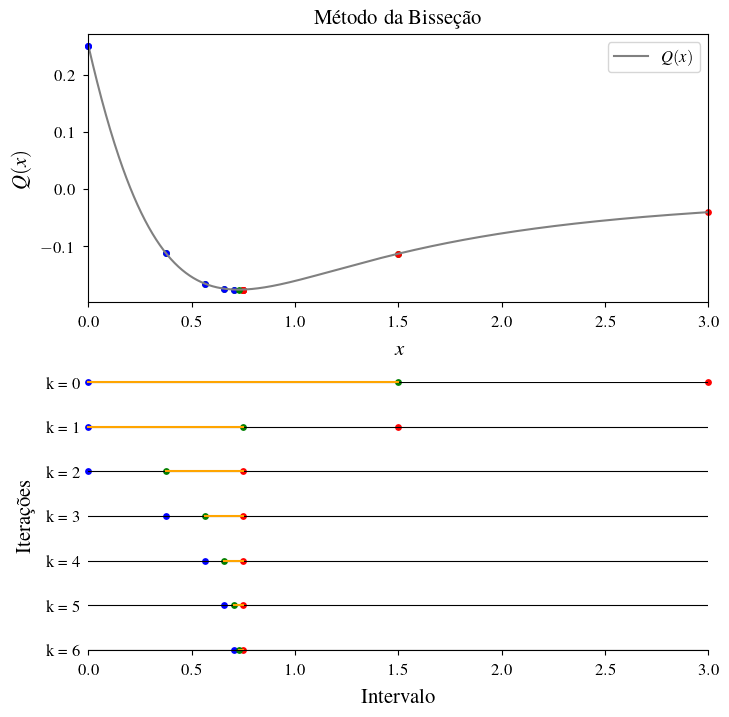

In [37]:
def metodoBissecao(a, b, f, tol=1e-4, maxIter=100):
    """
    Método de Bisseção para minimização.

    Parâmetros:
        • a: (float). Limite inferior do intervalo (inclusive).
        • b: (float). Limite superior do intervalo (inclusive).
        • f: (função). Função a ser minimizada.
        • tol: (float). Tolerância do valor da derivada como 1º critério de parada.
        • maxIter: (int). Número máximo de iterações como 2º critério de parada.
       Retorno:
          • (lista de tuplas):
            Para cada iteração:
            - k: (int). Iteração.
            - a: (float). Limite inferior do intervalo.
            - b: (float). Limite superior do intervalo.
            - c: (float). Novo limite inferior ou superior.
            - l: (float). Comprimento do intervalo.
            - f(a): (float). Valor da função no ponto a.
            - f(b): (float). Valor da função no ponto b.
            - f(c): (float). Valor da função no ponto c.
            - derivada: (float). Valor da derivada para avaliação.
    """

    resultados = []
    for k in range(maxIter):
        c = (a + b)/2
        derivada = (f(c + tol) - f(c - tol))/(2*tol) # aproximação da derivada numérica
        l = b - a
        resultados.append([k, a, b, c, l, f(a), f(b), f(c), derivada])

        # Atualização dos pontos para a próxima iteração
        if abs(derivada) < tol: # critério de parada
            break
        elif derivada > 0: # mínimo está à esquerda
            b = c
        else: # mínimo está à direita
            a = c

    return resultados

def plotMetodoBissecao(resultadosDict, f, fName):
    plt.rcParams.update({
        "font.family": "serif",
        "font.serif": ["Times"],
        "text.latex.preamble": r'\usepackage{amsfonts}',
        "text.usetex": True
    })
    px = 1/plt.rcParams["figure.dpi"]

    ks = len(resultadosDict["k"])
    fig, eixos = plt.subplots(2, 1, figsize=(800*px, 800*px))

    # Função
    xs = np.linspace(resultadosDict["a"][0], resultadosDict["b"][0], 1000)
    ys = f(xs)
    eixos[0].plot(xs, ys, color="gray", label=fr'${fName}(x)$')

    # Configurações
    eixos[0].set_xlim(round(resultadosDict["a"][0], 0), resultadosDict["b"][0])
    eixos[0].set_xlabel(r'$x$', labelpad=7.5, fontsize=15)
    eixos[0].set_ylabel(fr'${fName}(x)$', labelpad=7.5, fontsize=15)
    eixos[0].tick_params(pad=6, labelsize=12)
    eixos[0].set_title("Método da Bisseção", pad=7.5, fontsize=15)
    eixos[0].legend(loc="best", frameon=True, fontsize=12)

    # Intervalos de cada iteração
    for k in range(ks):
        a = resultadosDict["a"][k]
        b = resultadosDict["b"][k]
        c = resultadosDict["c"][k]
        f_a = resultadosDict["f(a)"][k]
        f_b = resultadosDict["f(b)"][k]
        f_c = resultadosDict["f(c)"][k]

        # Intervalos
        if resultadosDict["derivada"][k] > 0:
            xs = np.linspace(a, c, 1000)
            eixos[1].plot(xs, [ks - k]*len(xs), color="orange", clip_on=False)
        else:
            xs = np.linspace(c, b, 1000)
            eixos[1].plot(xs, [ks - k]*len(xs), color="orange", clip_on=False)

        # Limites
        eixos[0].scatter(a, f_a   , marker='o', color="blue" , clip_on=False, s=15)
        eixos[0].scatter(b, f_b   , marker='o', color="red"  , clip_on=False, s=15)
        eixos[0].scatter(c, f_c   , marker='o', color="green", clip_on=False, s=15)
        eixos[1].scatter(a, ks - k, marker='o', color="blue" , clip_on=False, s=15)
        eixos[1].scatter(b, ks - k, marker='o', color="red"  , clip_on=False, s=15)
        eixos[1].scatter(c, ks - k, marker='o', color="green", clip_on=False, s=15)

    # Configurações
    eixos[1].spines["left"].set_visible(False)
    eixos[1].spines["right"].set_visible(False)
    eixos[1].spines["top"].set_visible(False)
    eixos[1].set_xlim(round(resultadosDict["a"][0], 1), resultadosDict["b"][0])
    eixos[1].set_xlabel("Intervalo", labelpad=7.5, fontsize=15)
    eixos[1].set_ylim(1, ks)
    eixos[1].yaxis.set_ticklabels([rf'k = {k}' for k in range(ks-1, -1, -1)])
    eixos[1].set_ylabel("Iterações", labelpad=7.5, fontsize=15)
    eixos[1].tick_params(pad=6, labelsize=12)
    eixos[1].tick_params(axis="y", length=0)
    eixos[1].grid(axis="y", color="black")

    plt.subplots_adjust(hspace=0.3)
    plt.show()
    fig.savefig(f"figures/{fName}_bissecao.pdf", bbox_inches="tight", pad_inches=0)

a, b = 1e-4, 3
resultados = metodoBissecao(a, b, Q)

resultadosDict = {"k": [],
                  "a": [],
                  "b": [],
                  "c": [],
                  "l": [],
                  "f(a)": [],
                  "f(b)": [],
                  "f(c)": [],
                  "derivada": []}

for resultado in resultados:
    k, a, b, c, l, f_a, f_b, f_c, derivada = resultado
    resultadosDict["k"].append(k)
    resultadosDict["a"].append(a)
    resultadosDict["b"].append(b)
    resultadosDict["c"].append(c)
    resultadosDict["l"].append(l)
    resultadosDict["f(a)"].append(f_a)
    resultadosDict["f(b)"].append(f_b)
    resultadosDict["f(c)"].append(f_c)
    resultadosDict["derivada"].append(derivada)

resultadosDF = pd.DataFrame(resultadosDict)
resultadosDF.to_csv("tables/exer_2-a.csv", index=False)
resultadosTable = tabulate(resultadosDF, headers="keys", showindex=False, tablefmt="fancy_grid", numalign="right", floatfmt=".6f")

print(f"Tabela 3: Resultados para o Método da Bisseção em Q(x).")
print(resultadosTable)

plotMetodoBissecao(resultadosDict, Q, "Q")

### (b) 

In [38]:
def metodoSecaoAurea(a, b, f, tol=5e-2, maxIter=100):
    """
       Método da Seção Áurea para minimização.

    Parâmetros:
        • a: (float). Limite inferior do intervalo (inclusive).
        • b: (float). Limite superior do intervalo (inclusive).
        • f: (função). Função a ser minimizada.
        • tol: (float). Tolerância do valor do comprimento do intervalo como 1º critério de parada.
        • maxIter: (int). Número máximo de iterações como 2º critério de parada.
    Retorno:
        • (lista de tuplas):
            Para cada iteração:
            - k: (int). Iteração.
            - a: (float). Limite inferior do intervalo.
            - b: (float). Limite superior do intervalo.
            - l: (float). Comprimento do intervalo.
            - x1: (float). Possível novo limite inferior.
            - x2: (float). Possível novo limite superior.
            - f(x1): (float). Valor da função no ponto x1.
            - f(x2): (float). Valor da função no ponto x2.
    """

    rho = (3 - np.sqrt(5))/2 # razão áurea
    l = b - a
    x1 = a + rho*l
    x2 = b - rho*l
    f1, f2 = f(x1), f(x2)

    resultados = []
    for k in range(maxIter):
        resultados.append([k, a, b, l, x1, x2, f1, f2])

        # Atualização dos pontos para a próxima iteração
        if f1 < f2: # mínimo está à esquerda
            b = x2

            l = b - a
            x2, f2 = x1, f1
            x1 = a + rho*l
            f1 = f(x1)
        else: # mínimo está à direita
            a = x1

            l = b - a
            x1, f1 = x2, f2
            x2 = b - rho*l
            f2 = f(x2)

        if l < tol: break # critério de parada

    return resultados

a, b = 0, 3
resultados = metodoSecaoAurea(a, b, Q)

resultadosDict = {"k": [],
                  "a": [],
                  "b": [],
                  "l": [],
                  "x1": [],
                  "x2": [],
                  "f(x1)": [],
                  "f(x2)": []}

for resultado in resultados:
    k, a, b, l, x1, x2, f_1, f_2 = resultado
    resultadosDict["k"].append(k)
    resultadosDict["a"].append(a)
    resultadosDict["b"].append(b)
    resultadosDict["l"].append(l)
    resultadosDict["x1"].append(x1)
    resultadosDict["x2"].append(x2)
    resultadosDict["f(x1)"].append(f_1)
    resultadosDict["f(x2)"].append(f_2)

resultadosDF = pd.DataFrame(resultadosDict)
resultadosDF.to_csv("tables/exer_2-b.csv", index=False)
resultadosTable = tabulate(resultadosDF, headers="keys", showindex=False, tablefmt="fancy_grid", numalign="right", floatfmt=".6f")

print(f"Tabela 4: Resultados para o Método da Seção Áurea em Q(x).")
print(resultadosTable)

Tabela 4: Resultados para o Método da Seção Áurea em Q(x).
╒══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤═══════════╤═══════════╕
│        k │        a │        b │        l │       x1 │       x2 │     f(x1) │     f(x2) │
╞══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪═══════════╪═══════════╡
│ 0.000000 │ 0.000000 │ 3.000000 │ 3.000000 │ 1.145898 │ 1.854102 │ -0.146440 │ -0.086093 │
├──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼───────────┼───────────┤
│ 1.000000 │ 0.000000 │ 1.854102 │ 1.854102 │ 0.708204 │ 1.145898 │ -0.175524 │ -0.146440 │
├──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼───────────┼───────────┤
│ 2.000000 │ 0.000000 │ 1.145898 │ 1.145898 │ 0.437694 │ 0.708204 │ -0.136366 │ -0.175524 │
├──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼───────────┼───────────┤
│ 3.000000 │ 0.437694 │ 1.145898 │ 0.708204 │ 0.708204 │ 0.875388 │ -0.175524 │ -0.170224 │
├──────────┼─────────

## Exercício 3

Tabela 5: Resultados para o Método da Interpolação Quarática em D(θ).
╒══════════╤═══════════╤═══════════╤═══════════╤════════════╤═══════════╤════════════╕
│        k │        x1 │        x2 │        x3 │      f(x2) │        x* │      f(x*) │
╞══════════╪═══════════╪═══════════╪═══════════╪════════════╪═══════════╪════════════╡
│ 0.000000 │ 30.000000 │ 45.000000 │ 60.000000 │ 872.979454 │ 43.203599 │ 874.247295 │
├──────────┼───────────┼───────────┼───────────┼────────────┼───────────┼────────────┤
│ 1.000000 │ 30.000000 │ 43.203599 │ 45.000000 │ 874.247295 │ 43.328866 │ 874.258892 │
├──────────┼───────────┼───────────┼───────────┼────────────┼───────────┼────────────┤
│ 2.000000 │ 43.203599 │ 43.328866 │ 45.000000 │ 874.258892 │ 43.363125 │ 874.259459 │
├──────────┼───────────┼───────────┼───────────┼────────────┼───────────┼────────────┤
│ 3.000000 │ 43.328866 │ 43.363125 │ 45.000000 │ 874.259459 │ 43.363329 │ 874.259459 │
├──────────┼───────────┼───────────┼───────────┼────────────

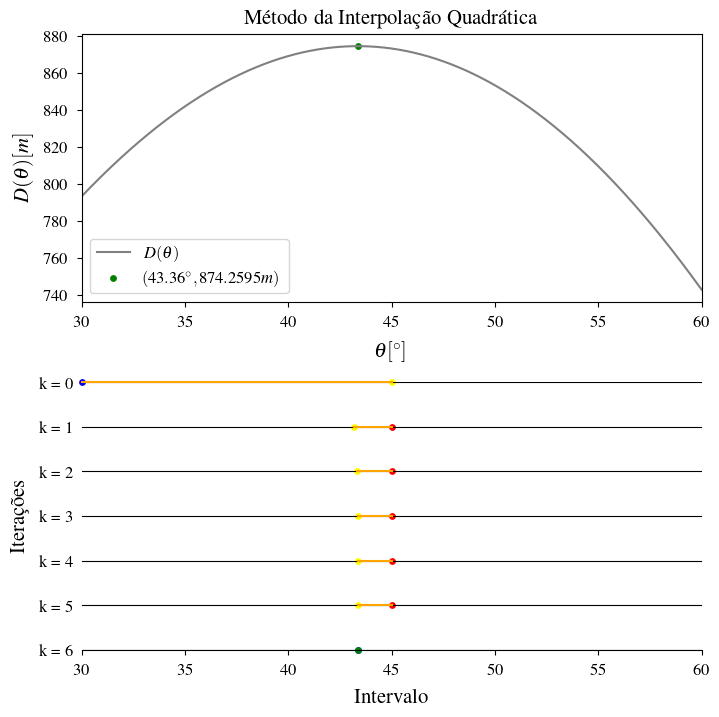

In [39]:
def metodoInterpolacaoQuadrada(x1, x2, x3, f, tol=1e-4, maxIter=100):
    """
    Método da Interpolação Quadrada para maximização.

    Parâmetros:
        • x1 (float ou lista de float): Limite inicial inferior.
        • x2 (float ou lista de float): Limite inicial intermediário.
        • x3 (float ou lista de float): Limite inicial superior.
        • f (função): Função a ser maximizada.
        • tol (float): Tolerância do valor do comprimenro abs(x1 - x3) como 1º critério de parada.
        • maxIter (int): Número máximo de iterações como 2º critério de parada.
    Retorno:
        • (lista de tuplas):
            Para cada iteração:
            - k: (int). Iteração.
            - x1: (float). Limite inferior.
            - x2: (float). Limite intermediário.
            - x3: (float). Limite superior.
            - f(x2): (float). Valor da função no ponto x2.
            - x*: (float). Vértice da parábola interpoladora.
            - f(x*): (float). Valor da função no ponto x*.
    """

    resultados = []
    for k in range(maxIter):
        f1, f2, f3 = f(x1), f(x2), f(x3)

        # Calcula o vértice da parábola interpoladora
        denominador = (x2 - x3)*f1 + (x3 - x1)*f2 + (x1 - x2)*f3
        if denominador < 1e-10: break # evita divisão por zero
        xe = 0.5*((x2**2 - x3**2)*f1 + (x3**2 - x1**2)*f2 + (x1**2 - x2**2)*f3) / denominador

        fe = f(xe)

        resultados.append([k, x1, x2, x3, f2, xe, fe])

        # Atualização dos pontos para a próxima iteração
        if xe > x2:
            if fe > f2: # máximo está à direita de x2
                x1, x2, x3 = x2, xe, x3
            else: # máximo está à esquerda de x*
                x1, x2, x3 = x1, x2, xe
        else:
            if fe > f2: # máximo está à esquerda, de x2
                x1, x2, x3 = x1, xe, x2
            else: # máximo está à direita de x*
                x1, x2, x3 = xe, x2, x3

        if abs(x1 - x3) < tol: break # critério de parada

    return resultados

def plotInterpolacaoQuadrada(resultadosDict, f, fName, intervalo):
    plt.rcParams.update({
        "font.family": "serif",
        "font.serif": ["Times"],
        "text.latex.preamble": r'\usepackage{amsfonts}',
        "text.usetex": True
    })
    px = 1/plt.rcParams["figure.dpi"]

    ks = len(resultadosDict["k"])
    fig, eixos = plt.subplots(2, 1, figsize=(800*px, 800*px))

    # Função
    xs = np.linspace(intervalo[0], intervalo[1], 1000)
    ys = f(xs)
    eixos[0].plot(xs, ys, color="gray", label=fr'${fName}(\theta)$')

    eixos[0].scatter(resultadosDict["x*"][-1], resultadosDict["f(x*)"][-1],
                       marker='o', color="green"  , clip_on=False, s=15,
                     label=fr'$({resultadosDict["x*"][-1]:.2f}^{{\circ}}, {resultadosDict["f(x*)"][-1]:.4f}m)$') # máximo

    # Configurações
    eixos[0].set_xlim(round(intervalo[0], 0), intervalo[1])
    eixos[0].set_xlabel(r'$\theta [^{\circ}]$', labelpad=7.5, fontsize=15)
    eixos[0].set_ylabel(fr'${fName}(\theta) [m]$', labelpad=7.5, fontsize=15)
    eixos[0].tick_params(pad=6, labelsize=12)
    eixos[0].set_title("Método da Interpolação Quadrática", pad=7.5, fontsize=15)
    eixos[0].legend(loc="best", frameon=True, fontsize=12)

    # Intervalos de cada iteração
    for k in range(ks):
        x1 = resultadosDict["x1"][k]
        x2 = resultadosDict["x2"][k]
        x3 = resultadosDict["x3"][k]
        f2 = resultadosDict["f(x2)"][k]
        xe = resultadosDict["x*"][k]
        fe = resultadosDict["f(x*)"][k]

        # Intervalos
        if xe > x2:
            if fe > f2: # máximo está à direita de x2
                xs = np.linspace(x2, x3, 1000)
                eixos[1].scatter(x2, ks - k, marker='o', color="yellow" , clip_on=False, s=15)
                eixos[1].scatter(x3, ks - k, marker='o', color="red"    , clip_on=False, s=15)
                eixos[1].plot(xs, [ks - k]*len(xs), color="orange", clip_on=False)
            else: # máximo está à esquerda de x*
                xs = np.linspace(x1, xe, 1000)
                eixos[1].scatter(x1, ks - k, marker='o', color="blue"   , clip_on=False, s=15)
                eixos[1].scatter(xe, ks - k, marker='o', color="green"  , clip_on=False, s=15)
                eixos[1].plot(xs, [ks - k]*len(xs), color="orange", clip_on=False)
        else:
            if fe > f2: # máximo está à esquerda de x2
                xs = np.linspace(x1, x2, 1000)
                eixos[1].scatter(x1, ks - k, marker='o', color="blue"   , clip_on=False, s=15)
                eixos[1].scatter(x2, ks - k, marker='o', color="yellow" , clip_on=False, s=15)
                eixos[1].plot(xs, [ks - k]*len(xs), color="orange", clip_on=False)
            else: # máximo está à direita de x*
                xs = np.linspace(xe, x3, 1000)
                eixos[1].scatter(xe, ks - k, marker='o', color="green"  , clip_on=False, s=15)
                eixos[1].scatter(x3, ks - k, marker='o', color="red"    , clip_on=False, s=15)
                eixos[1].plot(xs, [ks - k]*len(xs), color="orange", clip_on=False)

    # Configurações
    eixos[1].spines["left"].set_visible(False)
    eixos[1].spines["right"].set_visible(False)
    eixos[1].spines["top"].set_visible(False)
    eixos[1].set_xlim(intervalo[0], intervalo[1])
    eixos[1].set_xlabel("Intervalo", labelpad=7.5, fontsize=15)
    eixos[1].set_ylim(1, ks)
    eixos[1].yaxis.set_ticklabels([rf'k = {k}' for k in range(ks-1, -1, -1)])
    eixos[1].set_ylabel("Iterações", labelpad=7.5, fontsize=15)
    eixos[1].tick_params(pad=6, labelsize=12)
    eixos[1].tick_params(axis="y", length=0)
    eixos[1].grid(axis="y", color="black")

    plt.subplots_adjust(hspace=0.3)
    plt.show()
    fig.savefig(f"figures/{fName}_interpolacao-quadratica.pdf", bbox_inches="tight", pad_inches=0)

x1, x2, x3 = 30, 45, 60
resultados = metodoInterpolacaoQuadrada(x1, x2, x3, D)

resultadosDict = {"k": [],
                  "x1": [],
                  "x2": [],
                  "x3": [],
                  "f(x2)": [],
                  "x*": [],
                  "f(x*)": []}

for resultado in resultados:
    k, x1, x2, x3, f2, xe, fe = resultado
    resultadosDict["k"].append(k)
    resultadosDict["x1"].append(x1)
    resultadosDict["x2"].append(x2)
    resultadosDict["x3"].append(x3)
    resultadosDict["f(x2)"].append(f2)
    resultadosDict["x*"].append(xe)
    resultadosDict["f(x*)"].append(fe)

resultadosDF = pd.DataFrame(resultadosDict)
resultadosDF.to_csv("tables/exer_3.csv", index=False)
resultadosTable = tabulate(resultadosDF, headers="keys", showindex=False, tablefmt="fancy_grid", numalign="right", floatfmt=".6f")

print(f"Tabela 5: Resultados para o Método da Interpolação Quarática em D(θ).")
print(resultadosTable)

plotInterpolacaoQuadrada(resultadosDict, D, "D", [30, 60])

# Parte II

In [40]:
def J(x, y):
    """
    Função analítica J(x, y).

    Parâmetros:
        • x: (float ou lista de float). x ∈ R.
        • y: (float ou lista de float). y ∈ R.
    Retorno:
        • (float ou lista de float). J(x, y) ∈ R².
    """

    return 0.5*(x - 2)**2 + (y - 1)**2

def gradJ(x, y):
    """
    Gradiente da função analítica J(x, y).

    Parâmetros:
        • x: (float ou lista de float). x ∈ R.
        • y: (float ou lista de float). y ∈ R.
    Retorno:
        • (float ou lista de float). ∇J(x, y) ∈ R².
    """

    return np.array([x -2, 2*(y - 1)])

## Exercício 4

### (a)

In [41]:
def metodoGradBuscaExata(x0, f, gradf, delta, tol=1e-6, maxIter=1000):
    """
    Método do Gradiente com Busca Linear Exata.

    Parâmetros:
        • x0 (float ou lista de float): Coordenadas do ponto inicial.
        • f (função): Função f.
        • gradf (função): Gradiente de f (∇f).
        • delta (float): Limite superior do Método da Seção Áurea.
        • tol (float): Tolerância para convergência (||∇f||) como 1º critério de parada.
        • maxIter (int): Número máximo de iterações como 2º critério de parada.

    Retorno:
        • (lista de tuplas):
            Para cada iteração:
            - k: (int). Iteração.
            - x: (float). Coordenada x do ponto inicial.
            - y: (float). Coordenada y do ponto inicial.
            - f: (float). Valor da função.
            - ∇f: (float). Norma do gradiente da função.
            - α: (float). Possível novo limite superior.
            - Nf: (int). Número acumulativo de avaliações f via Método da Seção Áurea.
    """

    x = x0.copy()

    Nf = 0
    resultados = []
    for k in range(maxIter):
        grad = gradf(x[0], x[1])

        normGrad = np.linalg.norm(grad)
        if normGrad < tol: break # critério de parada

        d = -grad # direção de descida

        def phi(alhpa): return f(x[0] + alhpa*d[0], x[1] + alhpa*d[1]) # ϕ(α) = F(x + αd)

        # Encontra α* ∈ [0, δ] utilizando seção áurea
        resultadosMinPhi = metodoSecaoAurea(0, delta, phi)
        alpha = (resultadosMinPhi[-1][1] + resultadosMinPhi[-1][2])/2 # (a + b)/2
        Nf += len(resultadosMinPhi)*2 + 2 # avalia f 2 vezes inicialmente e 2 vezes por iteração 

        xProx = x + alpha*d
        resultados.append([k, x[0], x[1], f(x[0], x[1]), normGrad, alpha, Nf])
        x = xProx

    return resultados

x0 = np.array([-3.0, -2.0])
delta = 2.0

resultados = metodoGradBuscaExata(x0, J, gradJ, delta)

resultadosDict = {"k": [],
                  "x": [],
                  "y": [],
                  "f": [],
                  "||∇f||": [],
                  "α": [],
                  "Nf": []}

for resultado in resultados:
    k, x, y, f, normaGrad, alpha, Nf = resultado
    resultadosDict["k"].append(k)
    resultadosDict["x"].append(x)
    resultadosDict["y"].append(y)
    resultadosDict["f"].append(f)
    resultadosDict["||∇f||"].append(normaGrad)
    resultadosDict["α"].append(alpha)
    resultadosDict["Nf"].append(Nf)

resultadosDF = pd.DataFrame(resultadosDict)
resultadosDF.to_csv("tables/exer_4-a.csv", index=False)
resultadosTable = tabulate(resultadosDF, headers="keys", showindex=False, tablefmt="fancy_grid", numalign="right", floatfmt=".6f")

print(f"Tabela 6: Resultados para o Método do Gradiente com Busca Linear Exata em J(x, y).")
print(resultadosTable)

Tabela 6: Resultados para o Método do Gradiente com Busca Linear Exata em J(x, y).
╒═══════════╤═══════════╤═══════════╤═══════════╤══════════╤══════════╤════════════╕
│         k │         x │         y │         f │   ||∇f|| │        α │         Nf │
╞═══════════╪═══════════╪═══════════╪═══════════╪══════════╪══════════╪════════════╡
│  0.000000 │ -3.000000 │ -2.000000 │ 21.500000 │ 7.810250 │ 0.618034 │  18.000000 │
├───────────┼───────────┼───────────┼───────────┼──────────┼──────────┼────────────┤
│  1.000000 │  0.090170 │  1.708204 │  2.325278 │ 2.377743 │ 0.729490 │  36.000000 │
├───────────┼───────────┼───────────┼───────────┼──────────┼──────────┼────────────┤
│  2.000000 │  1.483372 │  0.674948 │  0.239111 │ 0.830385 │ 0.618034 │  54.000000 │
├───────────┼───────────┼───────────┼───────────┼──────────┼──────────┼────────────┤
│  3.000000 │  1.802666 │  1.076734 │  0.025359 │ 0.249987 │ 0.729490 │  72.000000 │
├───────────┼───────────┼───────────┼───────────┼──────────┼───────

### (b)

In [50]:
def metodoGradBuscaArmijo(x0, alpha0, f, gradf, theta, sigma, tol=1e-6, maxIter=1000):
    """
    Método do Gradiente com Busca Linear via Regra de Armijo.

    Parâmetros:
        • x0 (float ou lista de float): Coordenadas do ponto inicial.
        • alhpa0 (float): Chute inicial para o passo.
        • f (função): Função f.
        • gradf (função): Gradiente de f (∇f).
        • theta (float | 0 < theta < 1): Fator de redução do passo.
        • sigma (float | 0 < sigma < 1): Constante de decréscimo suficiente.
        • tol (float): Tolerância para convergência (||∇f||) como 1º critério de parada.
        • maxIter (int): Número máximo de iterações como 2º critério de parada.

    Retorno:
        • (lista de tuplas):
            Para cada iteração:
            - k: (int). Iteração.
            - x: (float). Coordenada x do ponto inicial.
            - y: (float). Coordenada y do ponto inicial.
            - f: (float). Valor da função.
            - ∇f: (float). Norma do gradiente da função.
            - α: (float). Passo.
            - Nf: (int). Número acumulativo de avaliações f via Regra de Armijo.
    """

    x = x0.copy()

    Nf = 0
    resultados = []
    for k in range(maxIter):
        grad = gradf(x[0], x[1])
        normGrad = np.linalg.norm(grad)
        if normGrad < tol: break # critério de parada

        d = -grad # direção de descida
        
        alpha = alpha0  # passo inicial

        fCorr = f(x[0], x[1])

        # Busca linear via Armijo
        while True:
            xProx = x + alpha*d
            fProx = f(xProx[0], xProx[1])
            Nf += 1
            
            # Condição de Armijo
            if fProx <= fCorr + sigma*alpha*grad.dot(d):
                break
            else: # reduz o passo
                alpha *= theta

        x = xProx

        resultados.append([k, x[0], x[1], f(x[0], x[1]), normGrad, alpha, Nf])
    
    return resultados

x0 = np.array([-3.0, -2.0])

# Fixar α0 e variar θ e σ
alpha0 = 1
theta = [0.1, 0.5, 0.9]
sigma = [0.01, 0.1, 0.5]

resultadosDict = {"(θ, σ)": [],
                  "k": [],
                  "x": [],
                  "y": [],
                  "f": [],
                  "||∇f||": [],
                  "α": [],
                  "Nf": []}

for theta_i in theta:
    for sigma_i in sigma:
        resultados = metodoGradBuscaArmijo(x0, alpha0, J, gradJ, theta_i, sigma_i)

        k, x, y, f, normaGrad, alpha, Nf = resultados[-1]

        resultadosDict["(θ, σ)"].append((theta_i, sigma_i))
        resultadosDict["k"].append(k)
        resultadosDict["x"].append(x)
        resultadosDict["y"].append(y)
        resultadosDict["f"].append(f)
        resultadosDict["||∇f||"].append(normaGrad)
        resultadosDict["α"].append(alpha)
        resultadosDict["Nf"].append(Nf)

resultadosDF = pd.DataFrame(resultadosDict)
resultadosDF.to_csv("tables/exer_4-b-1.csv", index=False)
resultadosTable = tabulate(resultadosDF, headers="keys", showindex=False, tablefmt="fancy_grid", numalign="right", floatfmt=".6f")

print(f"Tabela 7: Resultados para o Método do Gradiente com Busca Linear via Regra de Armijo em J(x, y) com α0 fixo.")
print(resultadosTable)

# Fixar θ e σ e variar α0
alpha0 = [0.1, 0.5, 1.5]
theta = 0.1
sigma = 0.5

resultadosDict = {"α0": [],
                  "k": [],
                  "x": [],
                  "y": [],
                  "f": [],
                  "||∇f||": [],
                  "α": [],
                  "Nf": []}

for alpha0_i in alpha0:
    resultados = metodoGradBuscaArmijo(x0, alpha0_i, J, gradJ, theta, sigma)

    k, x, y, f, normaGrad, alpha, Nf = resultados[-1]

    resultadosDict["α0"].append(alpha0_i)
    resultadosDict["k"].append(k)
    resultadosDict["x"].append(x)
    resultadosDict["y"].append(y)
    resultadosDict["f"].append(f)
    resultadosDict["||∇f||"].append(normaGrad)
    resultadosDict["α"].append(alpha)
    resultadosDict["Nf"].append(Nf)

resultadosDF = pd.DataFrame(resultadosDict)
resultadosDF.to_csv("tables/exer_4-b-2.csv", index=False)
resultadosTable = tabulate(resultadosDF, headers="keys", showindex=False, tablefmt="fancy_grid", numalign="right", floatfmt=".6f")

print(f"Tabela 8: Resultados para o Método do Gradiente com Busca Linear via Regra de Armijo em J(x, y) com θ e σ fixos.")
print(resultadosTable)

Tabela 7: Resultados para o Método do Gradiente com Busca Linear via Regra de Armijo em J(x, y) com α0 fixo.
╒═════════════╤═════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════╕
│ (θ, σ)      │   k │        x │        y │        f │   ||∇f|| │        α │   Nf │
╞═════════════╪═════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════╡
│ (0.1, 0.01) │  70 │ 2.000000 │ 1.000000 │ 0.000000 │ 0.000001 │ 0.100000 │  141 │
├─────────────┼─────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────┤
│ (0.1, 0.1)  │  70 │ 2.000000 │ 1.000000 │ 0.000000 │ 0.000001 │ 0.100000 │  141 │
├─────────────┼─────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────┤
│ (0.1, 0.5)  │ 146 │ 1.999999 │ 1.000000 │ 0.000000 │ 0.000001 │ 0.100000 │  294 │
├─────────────┼─────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────┤
│ (0.5, 0.01) │   1 │ 2.000000 │ 1.000000 │ 0.000000 │ 6.000000 │ 0.500000 │    3 │
├─────────────┼─────┼──────────┼──────────┼────────

### (c)

In [43]:
def metodoGradBusacaWolfe(x0, alpha0, f, gradf, theta, sigma1, sigma2, tol=1e-6, maxIter=1000):
    """
    Método do Gradiente com Busca Linear via Regra de Wolfe.
    
    Parâmetros:
        • x0 (float ou lista de float): Coordenadas do ponto inicial.
        • alpha0 (float): Chute inicial para o passo.
        • theta (float | 0 < theta < 1): Fator de redução do passo.
        • f (função): Função f.
        • gradf (função): Gradiente de f (∇f).
        • sigma1 (float | 0 < sigma1 < sigma2 < 1): Constante de decréscimo suficiente.
        • sigma2 (float | sigma1 < sigma2 < 1): Constante de curvatura.
        • tol (float): Tolerância para convergência (||∇f||) como 1º critério de parada.
        • maxIter (int): Número máximo de iterações como 2º critério de parada.
    
    Retorno:
        • (lista de tuplas):
            Para cada iteração:
            - k: (int). Iteração.
            - x: (float). Coordenada x do ponto inicial.
            - y: (float). Coordenada y do ponto inicial.
            - f: (float). Valor da função.
            - ∇f: (float). Norma do gradiente da função.
            - α: (float). Possível novo limite superior.
            - Nf: (int). Número acumulativo de avaliações de f via Regra de Wolfe.
            - N∇f: (int). Número acumulativo de avaliações de ∇f via Regra de Wolfe.
    """

    x = x0.copy()

    Nf = 0
    Ngradf = 0
    resultados = []
    for k in range(maxIter):
        grad = gradf(x[0], x[1])
        normaGrad = np.linalg.norm(grad)
        if normaGrad < tol: break # 1º critério de parada

        d = -grad # direção de descida
        
        alpha = alpha0  # passo inicial

        fCorr = f(x[0], x[1])
        grad_dot_d = grad.dot(d)

        # Busca linear via Wolfe
        while True:
            xProx = x + alpha*d
            fProx = f(xProx[0], xProx[1])
            Nf += 1

            # Condição de Armijo (Wolfe 1)
            if fProx > fCorr + sigma1*alpha*grad_dot_d:
                alpha *= theta # reduz o passo
                continue
            
            # Condição de Curvatura (Wolfe 2)
            gradWolfe = gradf(xProx[0], xProx[1])
            Ngradf += 1
            if gradWolfe.dot(d) < sigma2*grad_dot_d:
                alpha *= 1.5
                continue

            break # ambas condições satisfeitas

        x = xProx
        
        resultados.append([k, x[0], x[1], f(x[0], x[1]), normaGrad, alpha, Nf, Ngradf])

    return resultados

x0 = np.array([-3.0, -2.0])
alpha0 = 1.0

# Fixar θ e variar σ1 e σ2
theta = 0.4
sigma1 = [0.01, 0.03, 0.05]
sigma2 = [0.1, 0.3, 0.5]

resultadosDict = {"(σ1, σ2)": [],
                  "k": [],
                  "x": [],
                  "y": [],
                  "f": [],
                  "||∇f||": [],
                  "α": [],
                  "Nf": [],
                  "N∇f": []}

for sigma1_i in sigma1:
    for sigma2_i in sigma2:
        resultados = metodoGradBusacaWolfe(x0, alpha0, J, gradJ, theta, sigma1_i, sigma2_i)

        k, x, y, f, normaGrad, alpha, Nf, Ngradf  = resultados[-1]

        resultadosDict["(σ1, σ2)"].append((sigma1_i, sigma2_i))
        resultadosDict["k"].append(k)
        resultadosDict["x"].append(x)
        resultadosDict["y"].append(y)
        resultadosDict["f"].append(f)
        resultadosDict["||∇f||"].append(normaGrad)
        resultadosDict["α"].append(alpha)
        resultadosDict["Nf"].append(Nf)
        resultadosDict["N∇f"].append(Ngradf)

resultadosDF = pd.DataFrame(resultadosDict)
resultadosTable = tabulate(resultadosDF, headers="keys", showindex=False, tablefmt="fancy_grid", numalign="right", floatfmt=".6f")

print(f"Tabela 9: Resultados para o Método do Gradiente com Busca Linear via Regra de Wolfe em F(x, y) com α0 e θ fixos.")
print(resultadosTable)

# Fixar σ1 e σ2 variar θ
theta = [0.1, 0.3, 0.5, 0.7]
sigma1 = 1e-4
sigma2 = 0.8

resultadosDict = {"θ": [],
                  "k": [],
                  "x": [],
                  "y": [],
                  "f": [],
                  "||∇f||": [],
                  "α": [],
                  "Nf": [],
                  "N∇f": []}

for theta_i in theta:
    resultados = metodoGradBusacaWolfe(x0, alpha0, J, gradJ, theta_i, sigma1, sigma2)

    k, x, y, f, normaGrad, alpha, Nf, Ngradf  = resultados[-1]

    resultadosDict["θ"].append(theta_i)
    resultadosDict["k"].append(k)
    resultadosDict["x"].append(x)
    resultadosDict["y"].append(y)
    resultadosDict["f"].append(f)
    resultadosDict["||∇f||"].append(normaGrad)
    resultadosDict["α"].append(alpha)
    resultadosDict["Nf"].append(Nf)
    resultadosDict["N∇f"].append(Ngradf)

resultadosDF = pd.DataFrame(resultadosDict)
resultadosTable = tabulate(resultadosDF, headers="keys", showindex=False, tablefmt="fancy_grid", numalign="right", floatfmt=".6f")

print(f"Tabela 10: Resultados para o Método do Gradiente com Busca Linear via Regra de Wolfe em F(x, y) com σ1 e σ1 fixos.")
print(resultadosTable)

Tabela 9: Resultados para o Método do Gradiente com Busca Linear via Regra de Wolfe em F(x, y) com α0 e θ fixos.
╒═════════════╤═════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════╤═══════╕
│ (σ1, σ2)    │   k │        x │        y │        f │   ||∇f|| │        α │   Nf │   N∇f │
╞═════════════╪═════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════╪═══════╡
│ (0.01, 0.1) │  10 │ 2.000000 │ 1.000000 │ 0.000000 │ 0.000003 │ 0.600000 │   31 │    21 │
├─────────────┼─────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────┼───────┤
│ (0.01, 0.3) │  10 │ 2.000000 │ 1.000000 │ 0.000000 │ 0.000003 │ 0.400000 │   21 │    11 │
├─────────────┼─────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────┼───────┤
│ (0.01, 0.5) │  10 │ 2.000000 │ 1.000000 │ 0.000000 │ 0.000003 │ 0.400000 │   21 │    11 │
├─────────────┼─────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────┼───────┤
│ (0.03, 0.1) │  10 │ 2.000000 │ 1.000000 │ 0.000000 │ 0.00